## 1. 문제 정의

해양 생태계는 심각한 위기에 직면해 있다. 최근 보고서에 따르면, 해양 생물종의 88%가 플라스틱 쓰레기로 인해 부정적 영향을 받고 있으며, 일부 지역은 회복이 불가능한 정도로 오염되어 있다. 이러한 해양 오염은 인류의 생존 위기와도 연결되어 있다. 국제사회와 각국은 해양 쓰레기로부터 환경 및 생태적 위협을 차단하기 위해 다양한 연대와 협력 체계를 구축하고 있다. 하지만, 시민사회, 기업, 연구기관 등 모든 이들의 노력이 필요하다. 우리는 이제 플라스틱 사용을 줄이고, 대체 제품 개발, 첨단장비 활용 등을 통해 해양 쓰레기 문제를 해결해야 한다. 이는 미래 세대에게 건강한 바다를 물려주는 현 세대의 책무이다.

출처: https://www.hani.co.kr/arti/opinion/because/1054813.html

## 2. 데이터 수집 및 전처리

#(1) 데이터 수집

In [ ]:
# 수집된 이미지가 있으면
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

# Google Drive에 있는 img 폴더 경로
not_trash_folder = '/content/drive/MyDrive/인공지능 프로젝트/img/not_trash'
trash_folder = '/content/drive/MyDrive/인공지능 프로젝트/img/trash'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 수집된 이미지가 없다면
# 출판사 제공 깃허브 클론
!git clone https://github.com/2022infotextbook/ai-basic.git

# Google Drive에 있는 img 폴더 경로
not_trash_folder = '/content/ai-basic/4_ai_project/2_img/not_trash'
trash_folder = '/content/ai-basic/4_ai_project/2_img/trash'

In [ ]:
import os
from skimage import io

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

# 이미지 불러오기
def load_images(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        if filename.endswith(('.png', '.jpg', '.jpeg')):
            img = io.imread(os.path.join(folder_path, filename))
            if img is not None:
                images.append(img)
    return images

# 이미지 데이터 불러오기
not_trash_images = load_images(not_trash_folder)
trash_images = load_images(trash_folder)

print(f'해양생물 이미지 개수: {len(not_trash_images)}')
print(f'해양쓰레기 이미지 개수: {len(trash_images)}')

해양생물 이미지 개수: 200
해양쓰레기 이미지 개수: 200


#(2) 데이터 전처리

In [ ]:
# 이미지 크기 조정
import cv2
from skimage.transform import resize

# 이미지 크기 조정
def resize_images(images, width=128, height=128):
    resized_images = [cv2.resize(img, (width, height)) for img in images]
    return resized_images

not_trash_images = resize_images(not_trash_images)
trash_images = resize_images(trash_images)

In [ ]:
from skimage.util import random_noise
from skimage.transform import rotate, rescale
from skimage import exposure
from skimage.io import imread, imshow
import random
import numpy as np

def augment_data(images, degree=10, scaling_factor=0.1):
    augmented_images = []
    for image in images:
        # 회전
        angle = np.random.uniform(-degree, degree)
        rotated_image = rotate(image, angle, mode='edge')
        augmented_images.append(rotated_image)

        # 노이즈 추가
        noisy_image = random_noise(image)
        augmented_images.append(noisy_image)

        # 좌우 반전
        flip_lr_image = np.fliplr(image)
        augmented_images.append(flip_lr_image)

        # 수직 반전
        flip_ud_image = np.flipud(image)
        augmented_images.append(flip_ud_image)

        # 밝기 조절
        v_min, v_max = np.percentile(image, (0.2, 99.8))
        better_contrast = exposure.rescale_intensity(image, in_range=(v_min, v_max))
        augmented_images.append(better_contrast)

    return augmented_images

# 전체 데이터 증강
not_trash_images += augment_data(not_trash_images)
trash_images += augment_data(trash_images)

print(f'증강후 해양생물 이미지 개수: {len(not_trash_images)}')
print(f'증강후 해양쓰레기 이미지 개수: {len(trash_images)}')

증강후 해양생물 이미지 개수: 1200
증강후 해양쓰레기 이미지 개수: 1200


정규화 전:


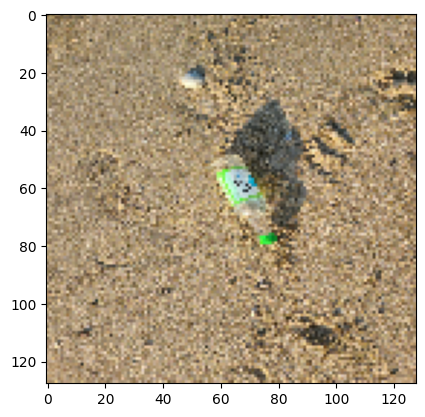

정규화 전 데이터 일부:
[[ 82  68  58]
 [136 115  65]
 [109  91  59]
 [161 137  93]
 [148 129  99]]
정규화 후:


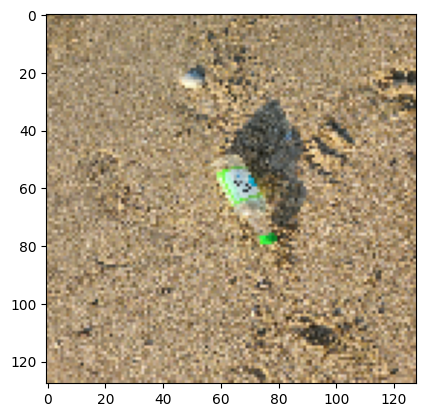

정규화 후 데이터 일부:
[[0.32156864 0.26666668 0.22745098]
 [0.53333336 0.4509804  0.25490198]
 [0.42745098 0.35686275 0.23137255]
 [0.6313726  0.5372549  0.3647059 ]
 [0.5803922  0.5058824  0.3882353 ]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def normalize_images(images):
    return np.array(images).astype('float32') / 255.0

# 정규화 전 이미지 출력
print("정규화 전:")
plt.imshow(trash_images[0])
plt.show()
print("정규화 전 데이터 일부:")
print(trash_images[0][0, :5])  # 이미지의 첫 행의 첫 5개 픽셀 값 출력

# 정규화
not_trash_images = normalize_images(not_trash_images)
trash_images = normalize_images(trash_images)

# 정규화 후 이미지 출력
print("정규화 후:")
plt.imshow(trash_images[0])
plt.show()
print("정규화 후 데이터 일부:")
print(trash_images[0][0, :5])  # 이미지의 첫 행의 첫 5개 픽셀 값 출력


In [ ]:
# 레이블링
import numpy as np

not_trash_labels = [1] * len(not_trash_images)
trash_labels = [0] * len(trash_images)

# 데이터와 레이블 병합
all_images = np.concatenate(
    (not_trash_images, trash_images), axis=0)
all_labels = np.array(not_trash_labels + trash_labels)

In [ ]:
# 학습용, 테스트용 데이터셋 분할 (80% 학습용, 20% 테스트용)
from sklearn.model_selection import train_test_split

train_images, test_images, train_labels, test_labels = train_test_split(
    all_images, all_labels, test_size=0.2, stratify=all_labels, random_state=42)

print(f'학습용 이미지 개수: {len(train_images)}')
print(f'테스트용 이미지 개수: {len(test_images)}')

학습용 이미지 개수: 1920
테스트용 이미지 개수: 480


## 3. 기계학습 유형과 알고리즘 선정

In [ ]:
# 학습용 데이터 차원 확인
print(f'학습용 이미지 차원: {train_images.shape}')
print(f'학습용 레이블 차원: {train_labels.shape}')

학습용 이미지 차원: (1920, 128, 128, 3)
학습용 레이블 차원: (1920,)


## 4. 기계학습을 통한 모델 생성

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

def create_deeper_cnn_model(input_shape):
    model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
        Conv2D(32, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),

        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),

        Conv2D(128, kernel_size=(3, 3), activation='relu'),
        Conv2D(128, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),

        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    return model

# 모델 생성 및 컴파일
input_shape = (128, 128, 3)
deeper_model = create_deeper_cnn_model(input_shape)
deeper_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 요약
deeper_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 62, 62, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 58, 58, 64)        3

In [ ]:
# 하이퍼파라미터 설정
epochs = 10
batch_size = 128

In [ ]:
# 모델 학습
history = deeper_model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/10
12/12 [==============================] - 176s 14s/step - loss: 2.4160 - accuracy: 0.5892 - val_loss: 0.6948 - val_accuracy: 0.5469
Epoch 2/10
12/12 [==============================] - 167s 14s/step - loss: 1.8356 - accuracy: 0.6367 - val_loss: 0.6840 - val_accuracy: 0.5677
Epoch 3/10
12/12 [==============================] - 160s 13s/step - loss: 1.3984 - accuracy: 0.6510 - val_loss: 0.7451 - val_accuracy: 0.4818
Epoch 4/10
12/12 [==============================] - 160s 14s/step - loss: 0.9618 - accuracy: 0.6706 - val_loss: 0.6961 - val_accuracy: 0.4974
Epoch 5/10
12/12 [==============================] - 159s 13s/step - loss: 0.7368 - accuracy: 0.6706 - val_loss: 0.6733 - val_accuracy: 0.5781
Epoch 6/10
12/12 [==============================] - 160s 13s/step - loss: 0.5757 - accuracy: 0.7155 - val_loss: 0.6982 - val_accuracy: 0.4844
Epoch 7/10
12/12 [==============================] - 160s 14s/step - loss: 0.5221 - accuracy: 0.7116 - val_loss: 0.6857 - val_accuracy: 0.4766
Epoch 

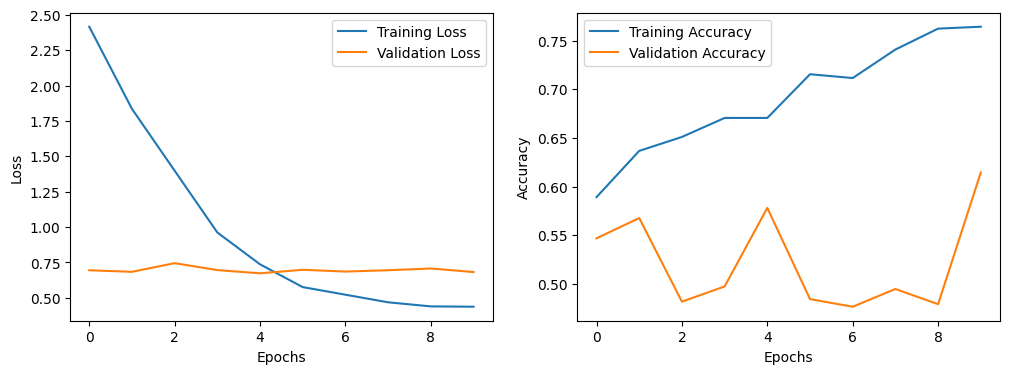

In [ ]:
# 학습 결과 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## 5. 성능 평가 및 수정

In [ ]:
# 모델 성능 평가
test_loss, test_accuracy = deeper_model.evaluate(test_images, test_labels)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


15/15 [==============================] - 11s 733ms/step - loss: 0.6738 - accuracy: 0.6562
Test Loss: 0.6737727522850037
Test Accuracy: 0.65625
